Mounted at /content/drive
num of classes: 5


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Cross-Validation F1 Scores: [0.9825 0.9825 0.985  0.9925 0.99   0.975  0.985  0.9825 0.9825 0.98  ]
Mean F1 Score from Cross-Validation: 0.98
Number of iterations to converge: 38


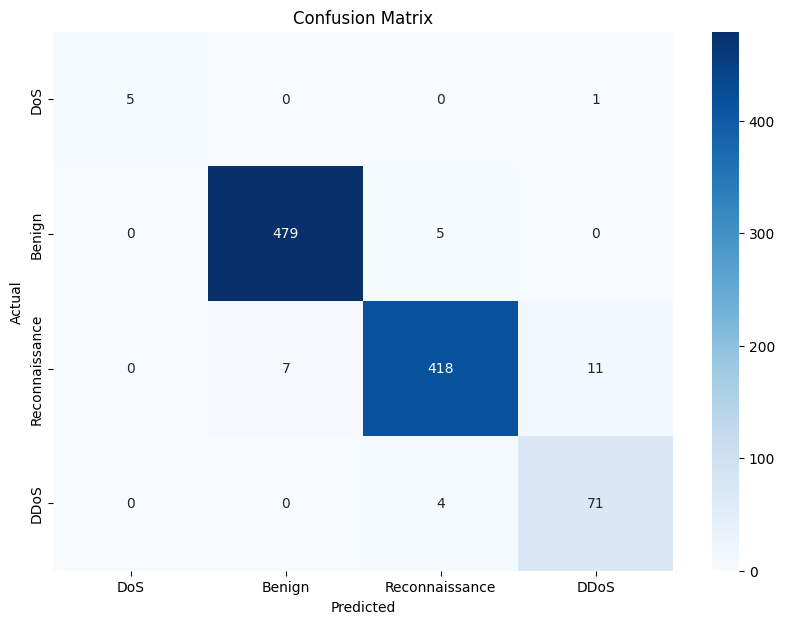

['logistic_regression_model.pkl']

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load CSV files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define file paths for training and testing datasets
train_file_path = '/content/drive/My Drive/IDS data sets/NF-BoT-IoT-V2_5000 samples_minmax_normalized_train.csv'
test_file_path = '/content/drive/My Drive/IDS data sets/NF-BoT-IoT-V2_5000 samples_minmax_normalized_test.csv'

# Load the datasets into DataFrames
train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Separate features and labels for training and testing datasets
X_train = train_data.iloc[:, :-1]  # All columns except the last two (labels)
y_train = train_data.iloc[:, -1]    # Last column (label names)

X_test = test_data.iloc[:, :-1]     # All columns except the last two (labels)
y_test = test_data.iloc[:, -1]       # Last column (label names)

# drop a feature
X_train = X_train.dropna(axis=1)
X_test = X_test.dropna(axis=1)

print('num of classes:',len(y_train.unique()))

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=100,random_state=42)

# Perform cross-validation on the training set
cv_scores = cross_val_score(logreg, X_train, y_train, cv=10, scoring='recall_weighted')


# Print cross-validation results
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean F1 Score from Cross-Validation: {cv_scores.mean():.2f}')

# Fit the model on the entire training set after cross-validation
logreg.fit(X_train, y_train)

# Get the number of iterations taken to converge
num_iterations = logreg.n_iter_[0]  # For binary classification, this will be a single value

# Print the number of iterations
print(f'Number of iterations to converge: {num_iterations}')

# Make predictions on the test set
y_pred = logreg.predict(X_test)


# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model to a file
joblib.dump(logreg, 'logistic_regression_model.pkl')

In [2]:
# Calculate evaluation metrics on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics in percentage format with two decimal places
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


Accuracy: 97.20%
Precision: 97.30%
Recall: 97.20%
F1 Score: 97.23%


In [3]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train ,cv = 10, scoring = 'recall_weighted')
avg_scores = scores.mean()
avg_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.98375

In [4]:
from sklearn.model_selection import cross_val_score
scores_test = cross_val_score(logreg, X_test, y_test ,cv = 10, scoring = 'recall_weighted')
avg_scores_test = scores_test.mean()
avg_scores_test

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


0.968019801980198

In [5]:
print("Train score is:",format(avg_scores))
print("Test score is:",format(avg_scores_test))

Train score is: 0.98375
Test score is: 0.968019801980198


In [6]:
# Import necessary libraries
import os
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path for the model and the folder name
model_folder = '/content/drive/My Drive/IDS data sets'
model_filename = 'logistic_regression_model.pkl'
model_path = os.path.join(model_folder, model_filename)

# Create the folder if it doesn't exist
if not os.path.exists(model_folder):
    os.makedirs(model_folder)

# Save the model to the specified path
joblib.dump(logreg, model_path)

print(f'Model saved successfully at: {model_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully at: /content/drive/My Drive/IDS data sets/logistic_regression_model.pkl
